### This is the EDA Part of the Project
# Hotels_Supervised Model -Classification-
## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
  - Loss of resources (revenue) when the hotel cannot resell the room due to last minute cancellation.
  - Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
  - Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
  - Human resources to make arrangements for the guests.

## Objective_Scenario

The objective is to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

### Data Dictionary

- no_of_adults: Number of adults

- no_of_children: Number of Children

- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

- type_of_meal_plan: Type of meal plan booked by the customer:
  - Not Selected – No meal plan selected
  - Meal Plan 1 – Breakfast
  - Meal Plan 2 – Half board (breakfast and one other meal)
  - Meal Plan 3 – Full board (breakfast, lunch, and dinner)

- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.

- lead_time: Number of days between the date of booking and the arrival date

- arrival_year: Year of arrival date

- arrival_month: Month of arrival date

- arrival_date: Date of the month

- market_segment_type: Market segment designation.

- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

- booking_status: Flag indicating if the booking was canceled or not.


In [130]:
# Import library
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

#For date manipulation
from datetime import datetime


# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To perform statistical analysis
import scipy.stats as stats

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


#For path arrange
from pathlib import Path


In [131]:
#Import csv
csv_path = Path('../data/raw/StarHotelsGroup.csv')
raw_data = pd.read_csv(csv_path)
df = raw_data.copy() #use raw data as ground true and df for usage

In [19]:
#Sample 20 rows
df.sample(20,random_state= 23)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
24007,1,0,1,1,Meal Plan 1,0,Room_Type 1,75,2019,1,7,Online,0,0,0,86.40,1,Not_Canceled
15432,1,0,0,3,Meal Plan 1,0,Room_Type 1,151,2018,1,19,Offline,0,0,0,71.00,0,Not_Canceled
56373,2,0,0,2,Meal Plan 2,0,Room_Type 1,292,2018,7,21,Offline,0,0,0,115.00,0,Canceled
28840,1,0,0,2,Not Selected,0,Room_Type 1,122,2019,5,11,Online,0,0,0,117.00,0,Not_Canceled
50002,2,2,0,3,Meal Plan 1,0,Room_Type 6,37,2019,6,8,Online,0,0,0,236.67,1,Canceled
5495,2,0,1,2,Meal Plan 1,0,Room_Type 1,63,2019,3,17,Online,0,0,0,97.20,0,Not_Canceled
3467,2,0,2,2,Not Selected,0,Room_Type 1,74,2019,3,11,Online,0,0,0,74.80,0,Not_Canceled
48903,2,0,0,2,Meal Plan 1,0,Room_Type 1,25,2018,1,29,Online,0,0,0,78.30,0,Canceled
25407,2,0,0,2,Meal Plan 1,0,Room_Type 1,245,2018,6,17,Offline,0,0,0,75.00,0,Canceled
30564,0,2,2,2,Meal Plan 1,0,Room_Type 2,177,2019,4,7,Online,0,0,0,103.05,0,Canceled


In [26]:
df.isnull().any()

no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

In [29]:
df.duplicated().value_counts()

False    42576
True     14350
Name: count, dtype: int64

- There are 14k duplicate row and no null rows, we can drop them

In [31]:
# removing the duplicate entries
df.drop_duplicates(inplace=True)
# rechecking the shape of the dataset
df.shape

(42576, 18)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  object 
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  object 
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_type 

- column names are in uniform shape
- no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, required_car_parking_space,lead_time, arrival_year, arrival_month, arrival_date, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, no_of_special_requests are int, this can remain
- type_of_meal_plan, room_type_reserved, market_segment_type, & dependent variable - booking_status are object, this might need to be change as needed

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,42576.0,1.916737,0.527524,0.0,2.0,2.0,2.0,4.0
no_of_children,42576.0,0.142146,0.459920,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,42576.0,0.895270,0.887864,0.0,0.0,1.0,2.0,8.0
no_of_week_nights,42576.0,2.321167,1.519328,0.0,1.0,2.0,3.0,17.0
required_car_parking_space,42576.0,0.034362,0.182160,0.0,0.0,0.0,0.0,1.0
lead_time,42576.0,77.315953,77.279616,0.0,16.0,53.0,118.0,521.0
arrival_year,42576.0,2018.297891,0.626126,2017.0,2018.0,2018.0,2019.0,2019.0
arrival_month,42576.0,6.365488,3.051924,1.0,4.0,6.0,9.0,12.0
arrival_date,42576.0,15.682873,8.813991,1.0,8.0,16.0,23.0,31.0
repeated_guest,42576.0,0.030886,0.173011,0.0,0.0,0.0,0.0,1.0


- Avg no_of_adults and median no_of_adults are 2 (no skewness). Similarly, avg_no_children and median no_of_children are 0 (no skewness), considering rounding of avgs... 25%, 50% and even 75% of no_of_children are 0. Max no_of_children is 10, much greater than 75%, indcating presence of outliers
- There is a huge difference between 75% and max for no_of_weekend_nights and no_of_week_nights indicating presence of outliers. Approx. avg and median no_of_weekend_nights & no_of_week_nights are 2 days & 1 day, considering rounding of avgs
- Min, 25%, 50%, 75% of required_car_parking_space is 0, indicating majority do not need parking. required_car_parking can be converted to a category 
- Avg lead_time (days b/w booking and check-in) is 77 days while median is 53 days, indicating right skewness
- Arival year, month and date are integers, these can be converted into categories 
- 25%, 50%, 75% repeated_guest is 0, indicating that most of the guests are not repeat guests. repeated_guest can be converted to a category as well
- 25%, 50%, 75% for no_of_previous_cancellations and no_of_previous_bookings_not_canceled are 0. The max in both categories are high 13 and 72 respectively, indicating outliers
- The avg. avg_price_per_room (i.e., avg price per day of reservation) is £112, less than median £135, indicating left skewness
- The max no_of_special_requests i.e, 5 is higher than the average, median, 75% (~1), indicating presence of outliers

In [35]:
df[["required_car_parking_space", "arrival_year", "arrival_month", "arrival_date", "repeated_guest"]] = \
df[["required_car_parking_space", "arrival_year", "arrival_month", "arrival_date", "repeated_guest"]].astype("category")

In [36]:
df.describe(include="object").T

,count,unique,top,freq
type_of_meal_plan,42576,4,Meal Plan 1,31863
room_type_reserved,42576,7,Room_Type 1,29730
market_segment_type,42576,5,Online,34169
booking_status,42576,2,Not_Canceled,28089


In [46]:
cat_col =df.select_dtypes(include = "category").columns

for i in cat_col:
    print(f"unique value in {i} are:")
    print(df[i].value_counts())
    print("*"*70)

unique value in required_car_parking_space are:
required_car_parking_space
0    41113
1     1463
Name: count, dtype: int64
**********************************************************************
unique value in arrival_year are:
arrival_year
2018    22107
2019    16576
2017     3893
Name: count, dtype: int64
**********************************************************************
unique value in arrival_month are:
arrival_month
8     5312
7     4725
5     4348
4     4227
6     4073
3     4044
10    3209
9     3057
2     2889
12    2385
11    2192
1     2115
Name: count, dtype: int64
**********************************************************************
unique value in arrival_date are:
arrival_date
2     1513
17    1491
11    1470
26    1469
27    1466
20    1465
19    1454
29    1441
5     1433
12    1429
16    1427
13    1423
15    1419
7     1412
3     1412
8     1404
28    1401
9     1399
21    1399
6     1397
4     1395
18    1374
10    1372
1     1317
25    1304
23    1282
22    126

- Majority (close to 75%) have registered only for Meal Plan 1 (breakfast). Negligible % have registered for Meal Plan 3 i.e., all 3 meals. Quite a few did not select the meal plan
- Majority (close to 70%) have registered for Room_type 1
- Majority (75%+) are online guests (under market_segment_type)
- Approx. 66% have not canceled reservations and 34% have canceled

## EDA

In [72]:
#Define plotting functions that can be use for EDA
def histogram_boxplot(data,feature,figsize = (12,7),kde= False,bins = None):
    """
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    
    return: 1 by 2 of box plot and histogram
    """
    fig, (ax_box,ax_hist) = plt.subplots(figsize = figsize,
                                        nrows = 2,
                                        sharex = True,
                                        gridspec_kw = {"height_ratios":(0.25,0.75)},
                                        )
    sns.boxplot(data = data,x=feature,ax= ax_box,showmeans = True, color = 'violet')
    sns.histplot(data = data,x=feature,kde= kde, ax = ax_hist,bins = bins,palette = 'summer') if bins else sns.histplot(data = data,x=feature,kde= kde, ax = ax_hist)
    ax_hist.axvline(data[feature].mean(),color='green',linestyle ="--")
    ax_hist.axvline(data[feature].median(),color ='yellow',linestyle = "-")
    


In [86]:
def univariable_related(data,feature1,feature2,figsize = (15,7)):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize = figsize)
    sns.countplot(data = data,x=feature1,ax = ax1,palette= "winter")
    sns.countplot(data = data,x=feature2,ax = ax2,palette= 'summer')

In [115]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [135]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


<Axes: xlabel='no_of_special_requests', ylabel='count'>

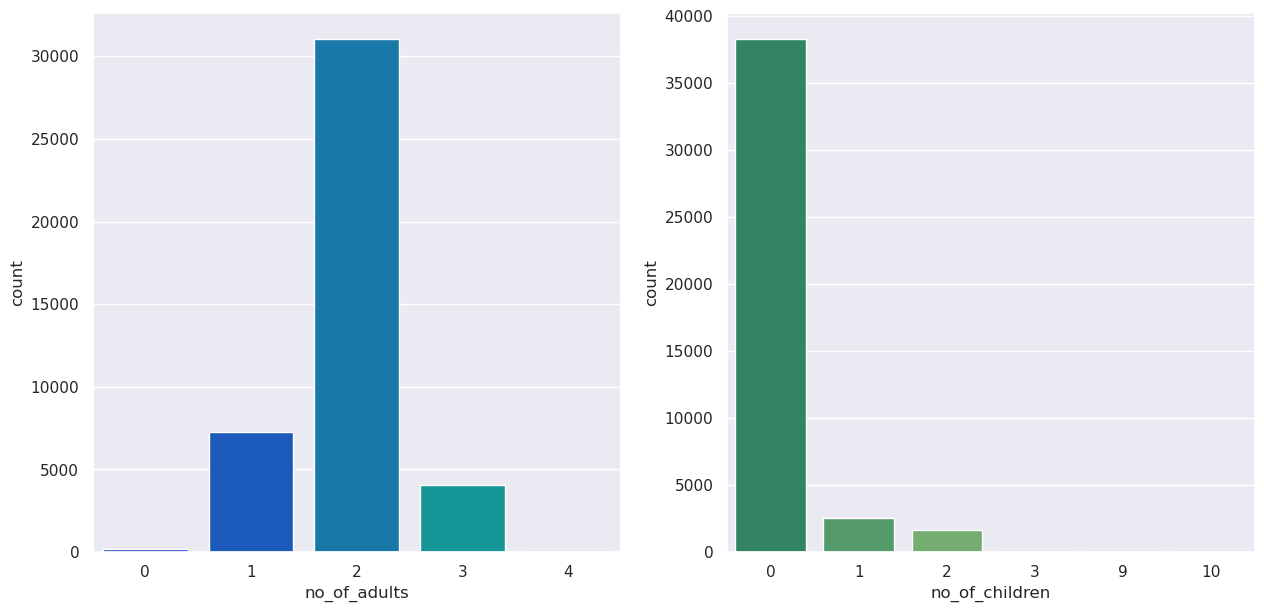

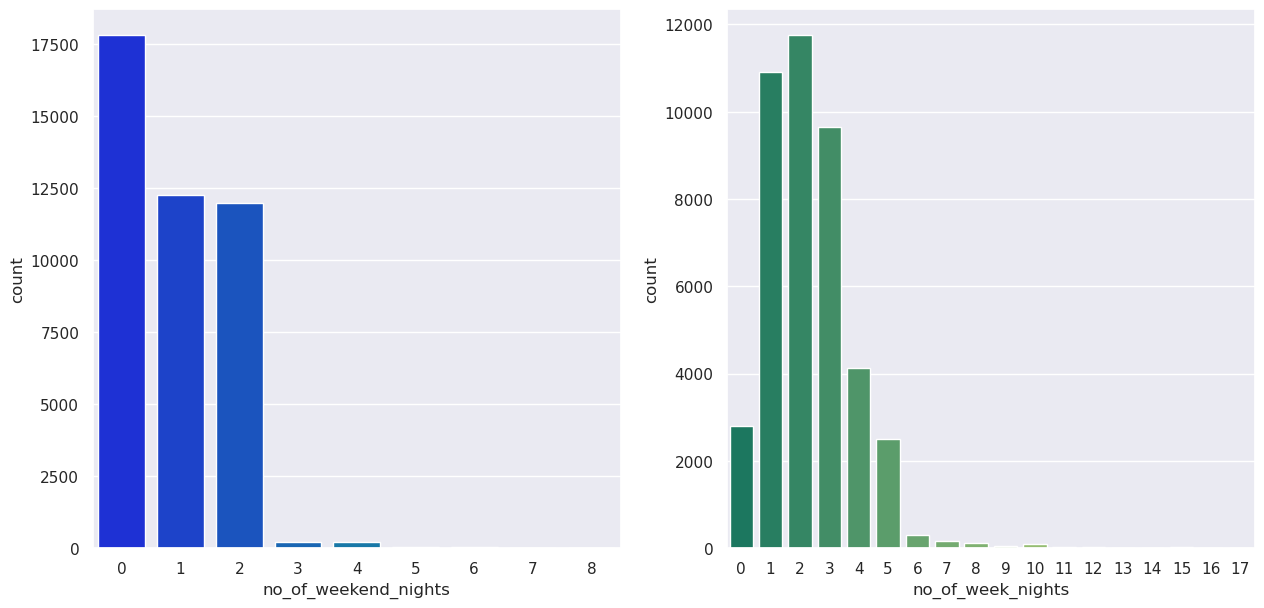

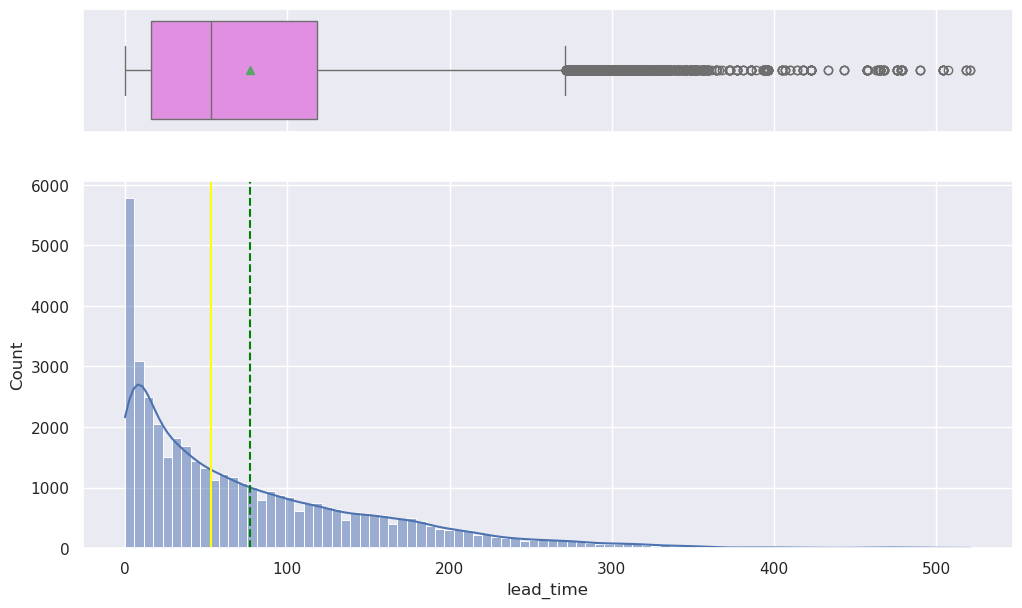

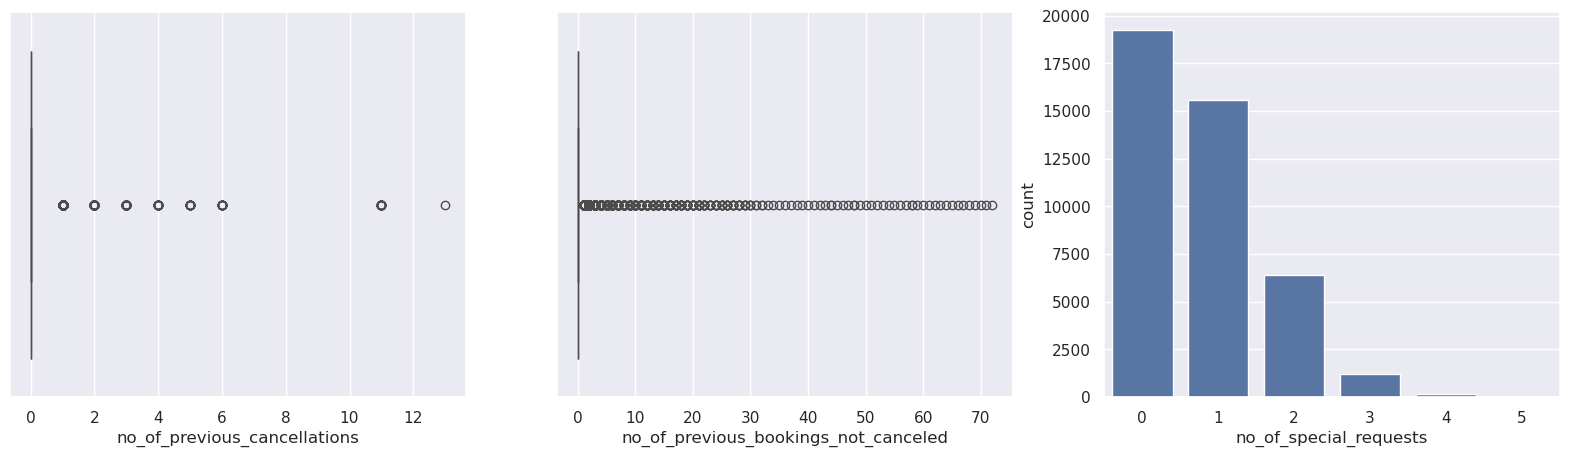

In [109]:
# univariate, no_of_adults, no_of_children
univariable_related(df,feature1 = "no_of_adults",feature2= 'no_of_children')

# univariate, no_of_weekend_nights, no_of_week_nights
univariable_related(df,feature1 = "no_of_weekend_nights",feature2= 'no_of_week_nights')

# univariate, lead_time
histogram_boxplot(df, "lead_time", kde=True)

# univariate, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, no_of_special_requests

fig,ax=plt.subplots(1,3, figsize=(20,5))
sns.boxplot(data=df, x="no_of_previous_cancellations", ax=ax[0])
sns.boxplot(data=df, x="no_of_previous_bookings_not_canceled", ax=ax[1])
sns.countplot(data=df, x="no_of_special_requests", ax=ax[2])


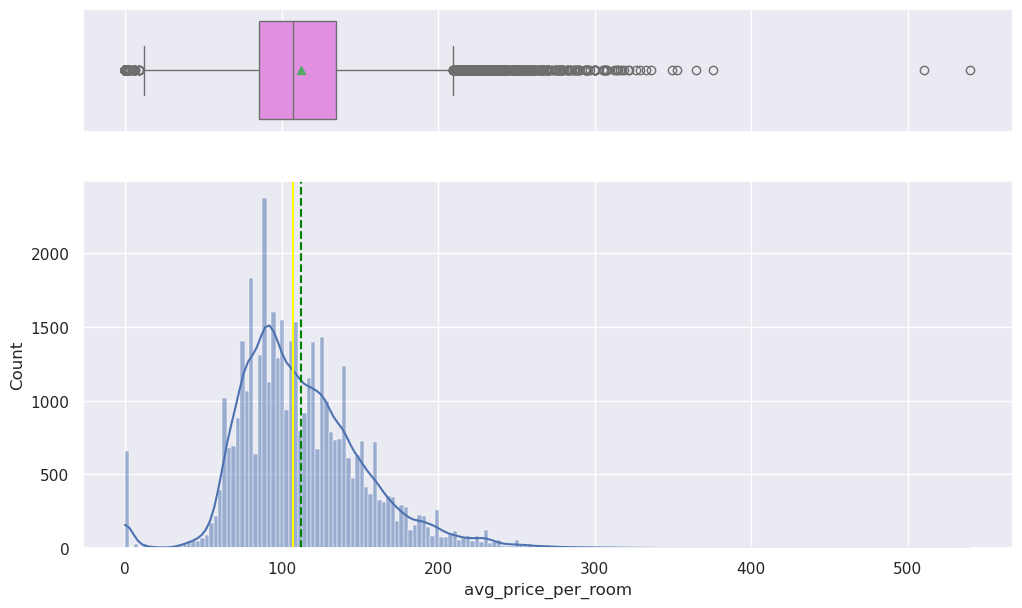

In [111]:
#Average room rate
histogram_boxplot(df, "avg_price_per_room", kde =True)

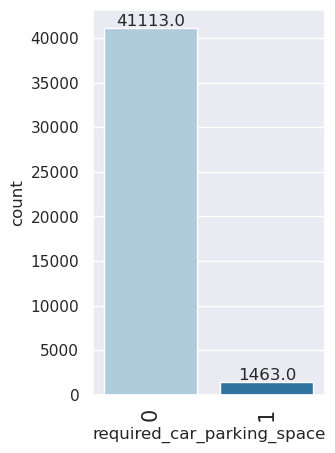

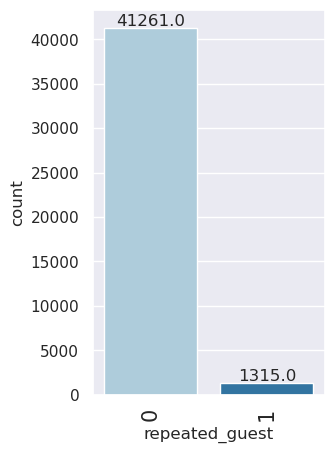

In [116]:
# univariate, required_car_parking_space, repeated_guest

labeled_barplot(df, "required_car_parking_space")
labeled_barplot(df, "repeated_guest")

In [142]:
df.drop(df[(df["arrival_year"]==2018) & (df["arrival_month"]==2) & \
                          (df["arrival_date"]==29)].index, inplace=True)
df.shape

(56926, 18)

In [139]:
df["arrival_date_combined"] = pd.to_datetime(df.arrival_year.astype(str)+'/'+ \
                                               df.arrival_month.astype(str)+'/'+ \
                                               df.arrival_date.astype(str))

DateParseError: Unknown datetime string format, unable to parse: 2017/Winter/2, at position 0

In [140]:
print(df["arrival_date_combined"].min())
print(df["arrival_date_combined"].max())

KeyError: 'arrival_date_combined'

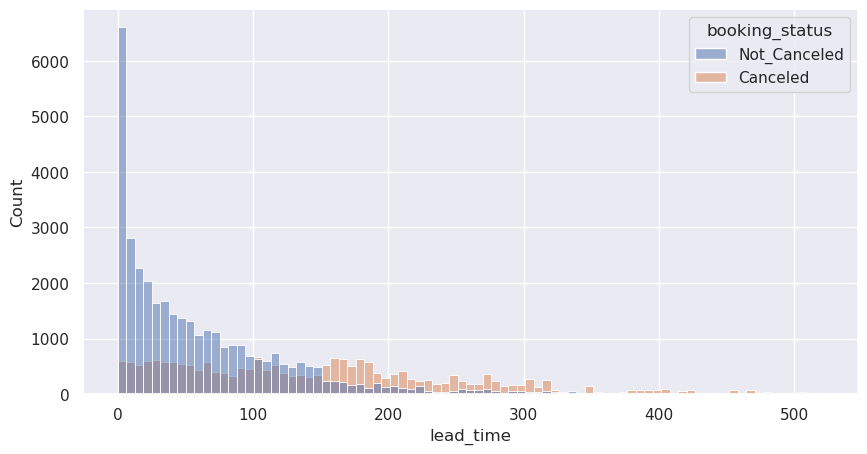

In [143]:
# bivariate, lead_time(how in advance before check-in are bookings made) & booking_status

plt.figure(figsize=(10,5))
sns.histplot(data=df, x="lead_time", hue="booking_status");

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                21548         35378  56926
7                   3024          2846   5870
8                   2998          3404   6402
6                   2912          3326   6238
5                   2517          3315   5832
4                   2462          3202   5664
10                  1880          3437   5317
9                   1538          3073   4611
3                   1536          3336   4872
2                    999          2477   3476
11                   875          2105   2980
1                    405          2238   2643
12                   402          2619   3021
------------------------------------------------------------------------------------------------------------------------


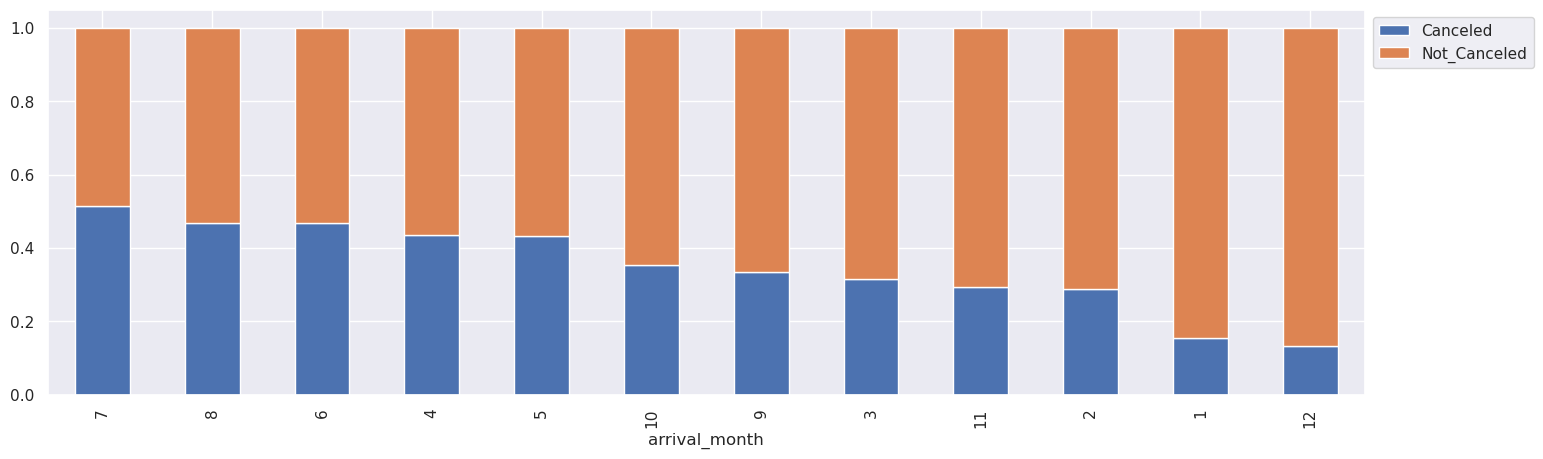

In [136]:
# bivariate, arrival_month & booking_status

stacked_barplot(df, "arrival_month", "booking_status")

In [137]:
#To simplify We will combine summer months (March-August) & winter months (September-February)

df["arrival_month"] = df["arrival_month"].astype("object")

df.loc[df.arrival_month==1, "arrival_month"] = "Winter"

df.loc[df.arrival_month==2, "arrival_month"] = "Winter"

df.loc[df.arrival_month==3, "arrival_month"] = "Summer"

df.loc[df.arrival_month==4, "arrival_month"] = "Summer"

df.loc[df.arrival_month==5, "arrival_month"] = "Summer"

df.loc[df.arrival_month==6, "arrival_month"] = "Summer"

df.loc[df.arrival_month==7, "arrival_month"] = "Summer"

df.loc[df.arrival_month==8, "arrival_month"] = "Summer"

df.loc[df.arrival_month==9, "arrival_month"] = "Winter"

df.loc[df.arrival_month==10, "arrival_month"] = "Winter"

df.loc[df.arrival_month==11, "arrival_month"] = "Winter"

df.loc[df.arrival_month==12, "arrival_month"] = "Winter"

df["arrival_month"] = df["arrival_month"].astype("category")

In [146]:
df.drop(["arrival_year", "arrival_date", ],axis=1,inplace = True ) #dropping arrival_year and arrival_date

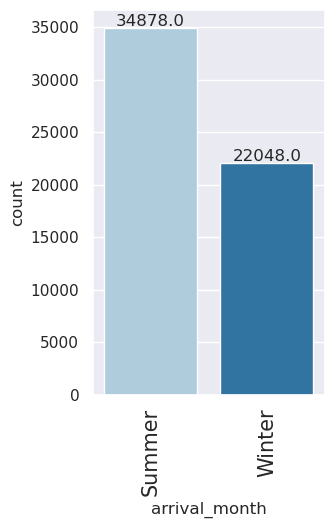

In [147]:
labeled_barplot(df, "arrival_month")

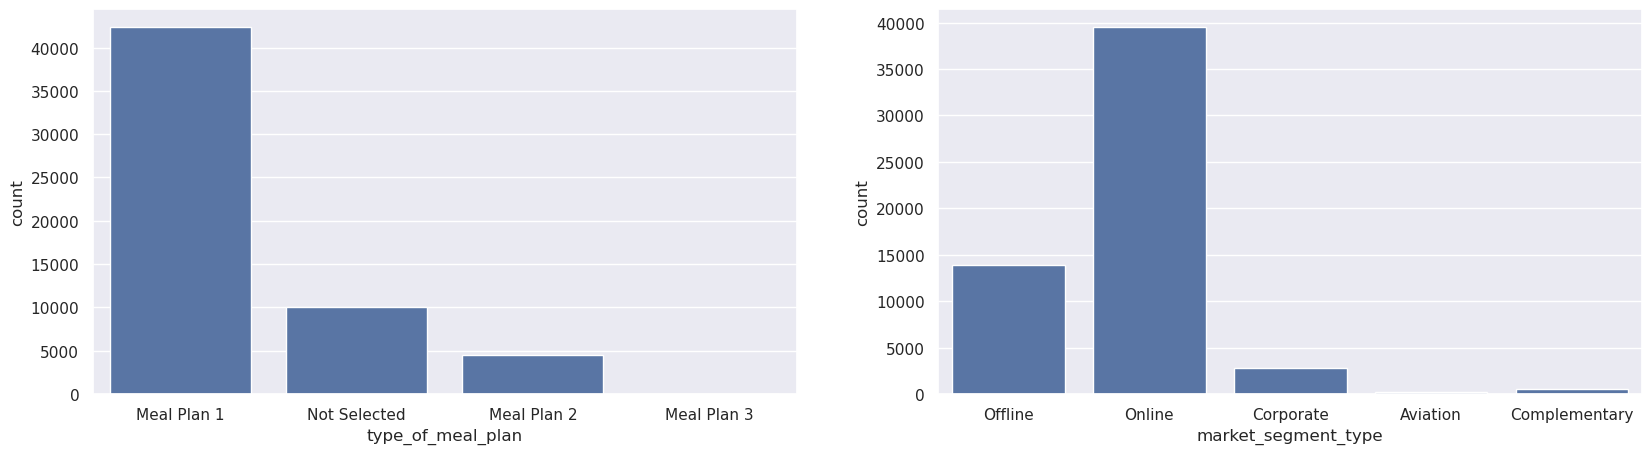

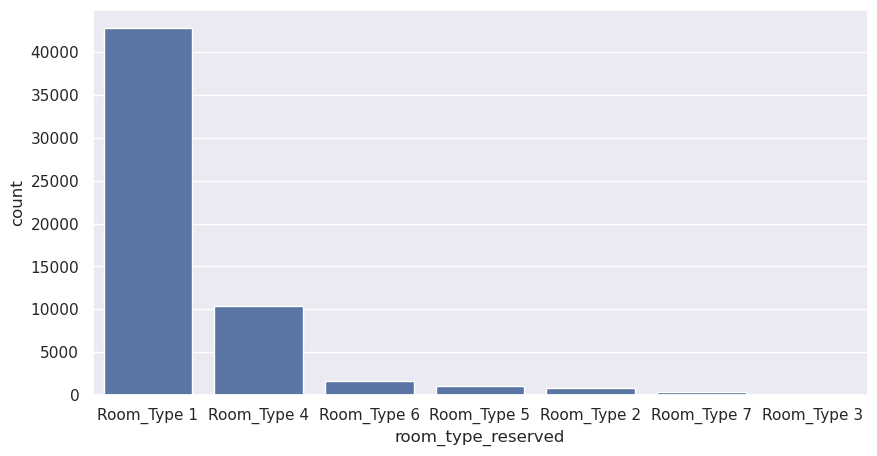

In [148]:
# univariate, type_of_meal_plan, room_type_reserved, market_segment_type, booking_status

fig,ax=plt.subplots(1,2, figsize=(20,5))
sns.countplot(data=df, x="type_of_meal_plan", ax=ax[0])
sns.countplot(data=df, x="market_segment_type", ax=ax[1])
plt.show()
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="room_type_reserved")
plt.show()

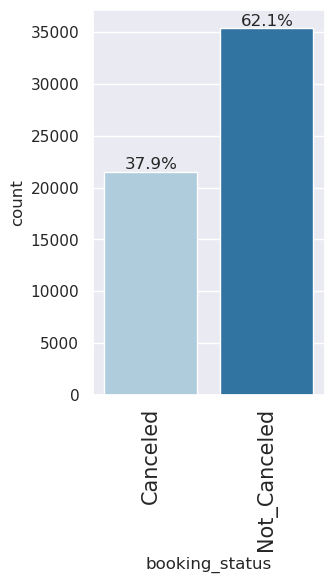

In [152]:
labeled_barplot(df, "booking_status", perc=True)